In [2]:
import cv2 # импорт OpenCV
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
files = os.listdir()
fls = []
for i in range(len(files)):
  if files[i].endswith('.jpg') or files[i].endswith('.png'):
    fls.append(files[i])
fls

['A.jpg',
 'bus.jpg',
 'car.jpg',
 'cat.jpg',
 'cat.png',
 'fox.jpg',
 'horse.jpg',
 'tennis_ball.jpg']

In [4]:
imgList = []
for i in range(len(fls)):
  imgList.append(cv2.imread(fls[i]))

1. получите полутоновое изображение.

In [5]:
imgListGray = []
for i in range(len(imgList)):
  imgListGray.append(cv2.cvtColor(imgList[i],cv2.COLOR_BGR2GRAY))


2. изображение высотой в 400 пикселей. Укажите, какуюинтерполяциюследует использовать для каждой картики (желательно, чтобывыборпроисходил автоматически).

In [479]:
for i in range(len(imgListGray)):
  procent = 400 / (imgListGray[i].shape[0] / 100)
  imgListGray[i] = cv2.resize(imgListGray[i],(int((imgListGray[i].shape[1] / 100 ) * procent), 400))

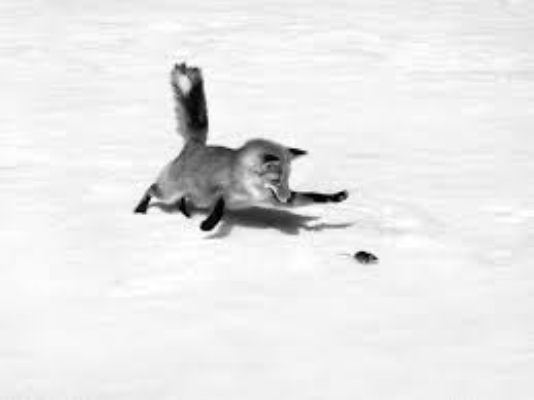

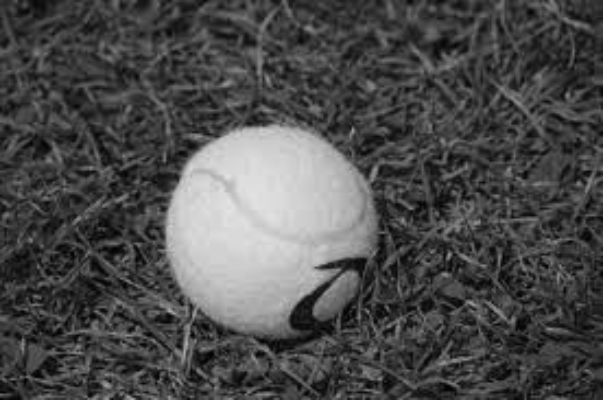

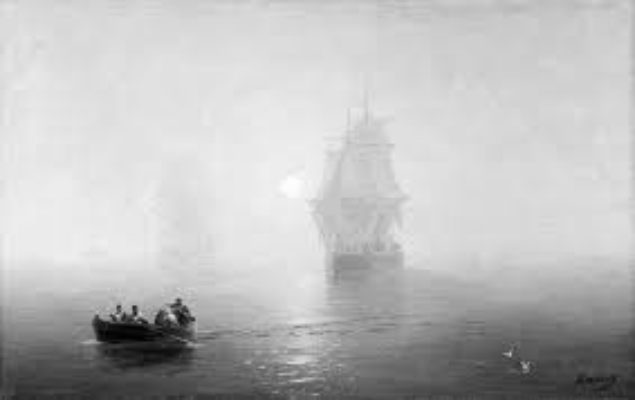

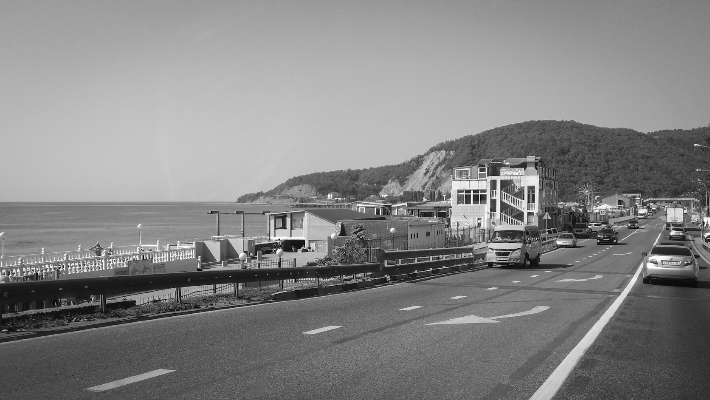

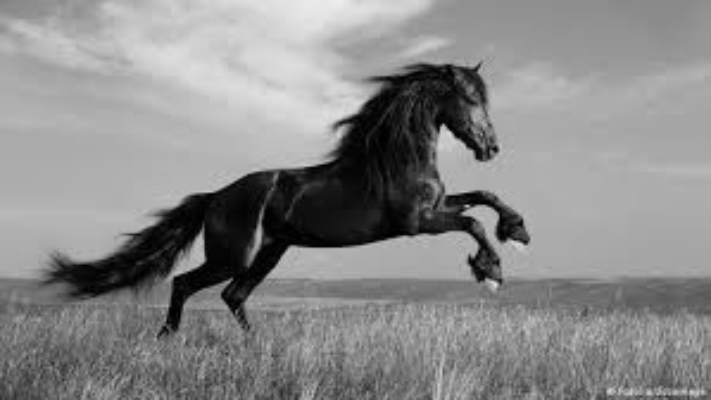

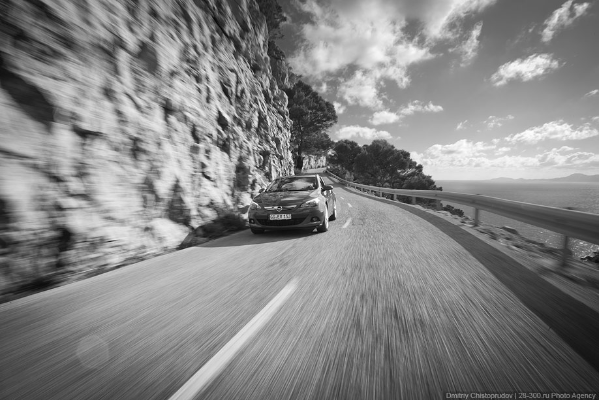

In [480]:
for i in range(len(imgListGray)):
  cv2_imshow(imgListGray[i])

3. повернутое на 180 и 90 градусов изображения.

In [481]:
def rotate(img, angle):
  height, width = img.shape[:2]
  point = (width // 2, height // 2)
  mat = cv2.getRotationMatrix2D(point, angle, 1)
  return cv2.warpAffine(img,mat,(width, height))

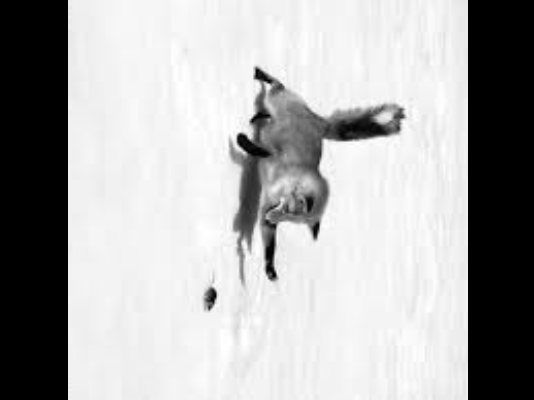

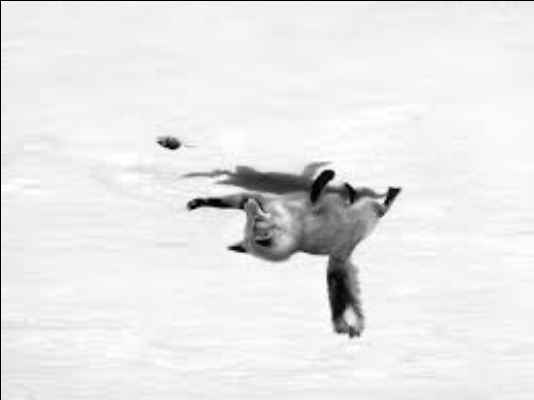

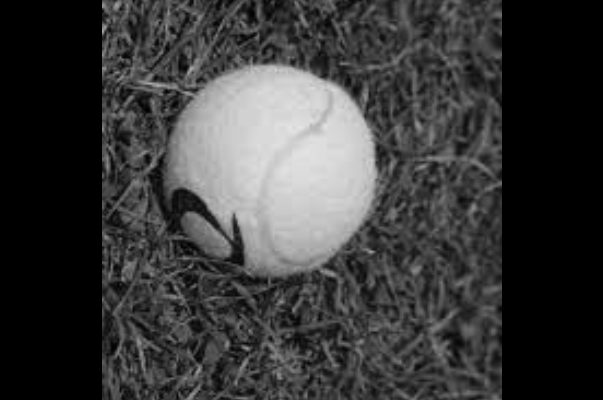

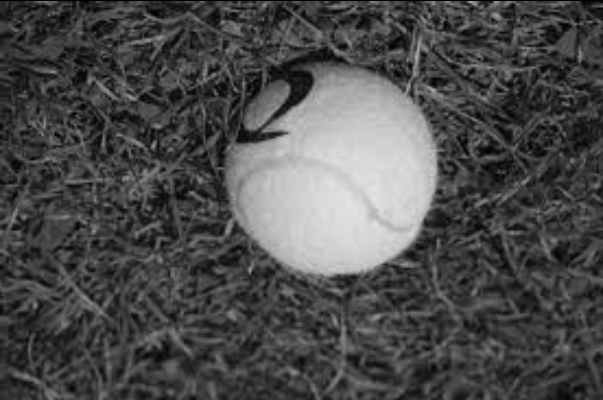

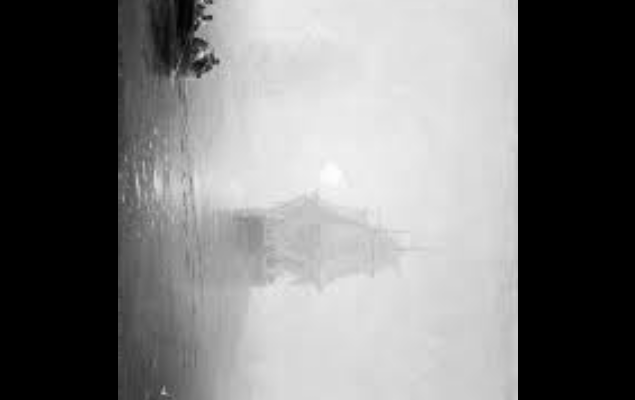

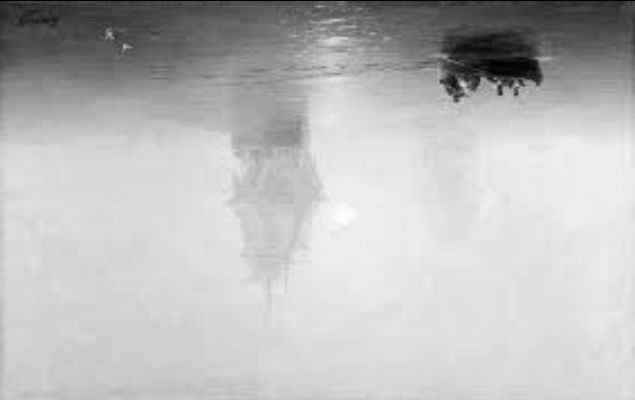

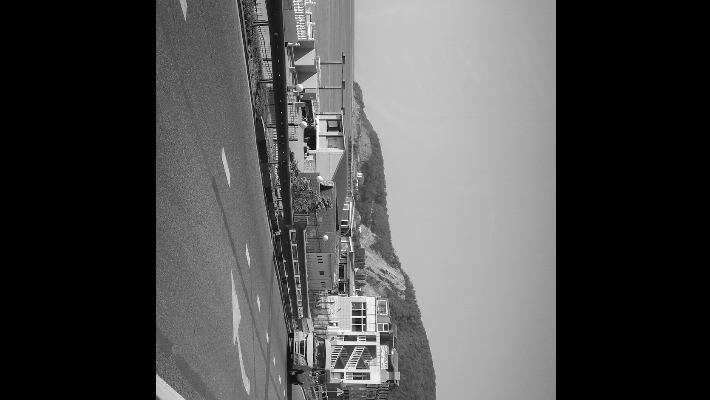

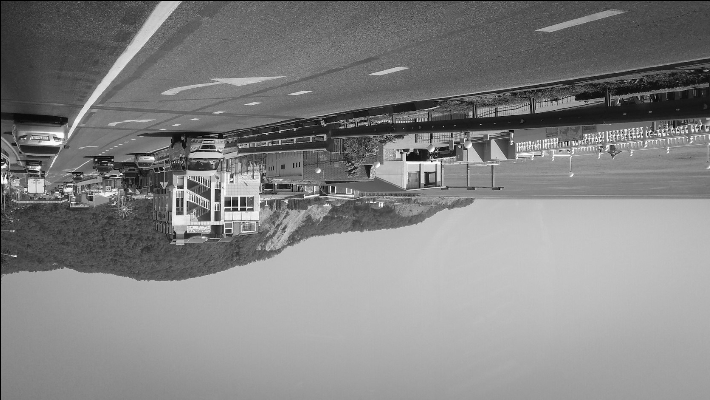

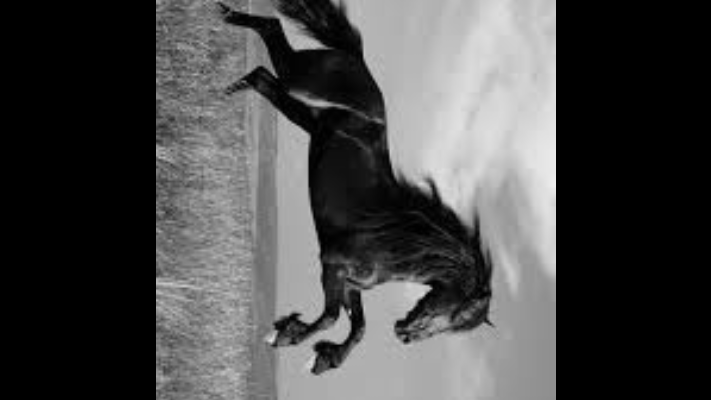

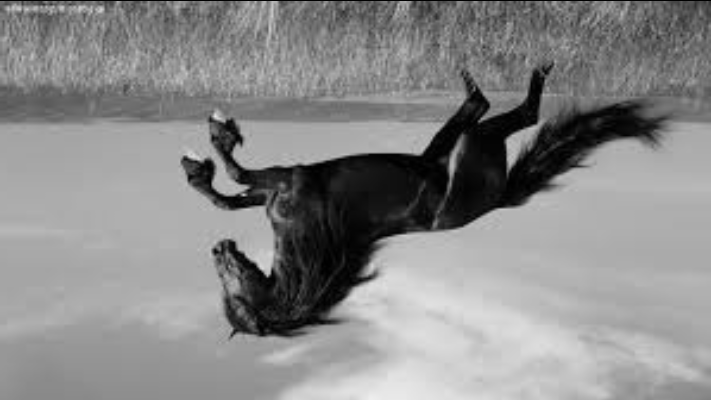

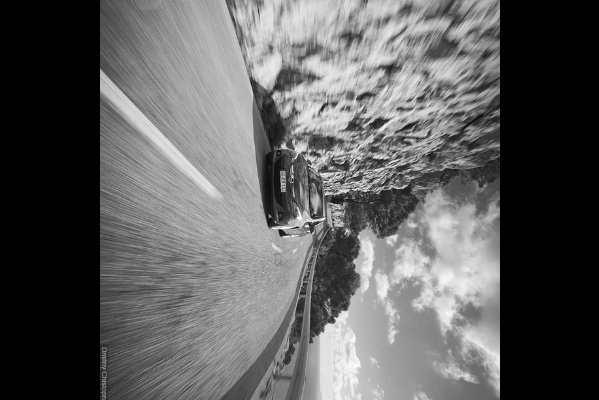

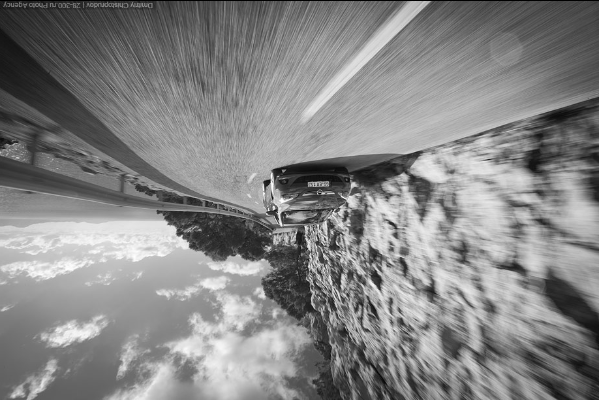

In [482]:
for i in range(len(imgListGray)):
  cv2_imshow(rotate(imgListGray[i], -90))
  cv2_imshow(rotate(imgListGray[i], -180))

4. верикальное и горизонтальное отражение изображения.

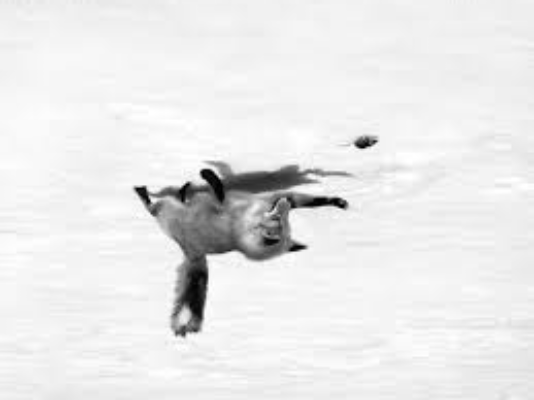

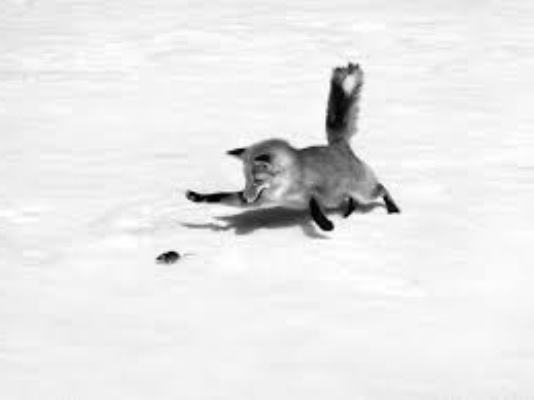

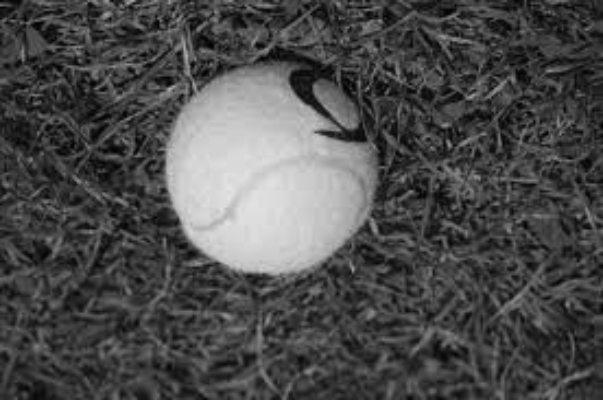

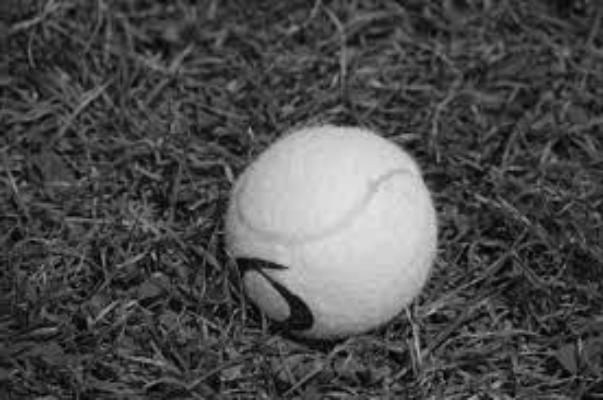

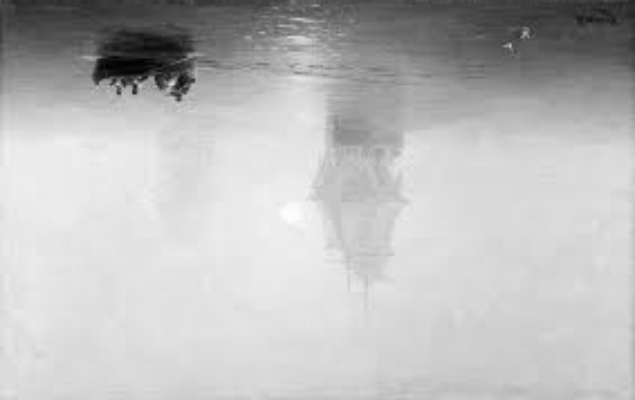

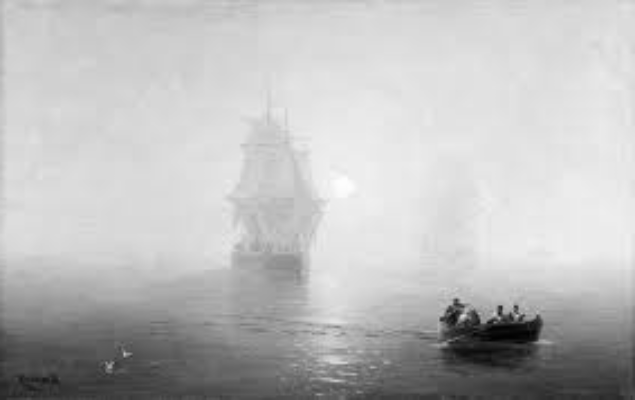

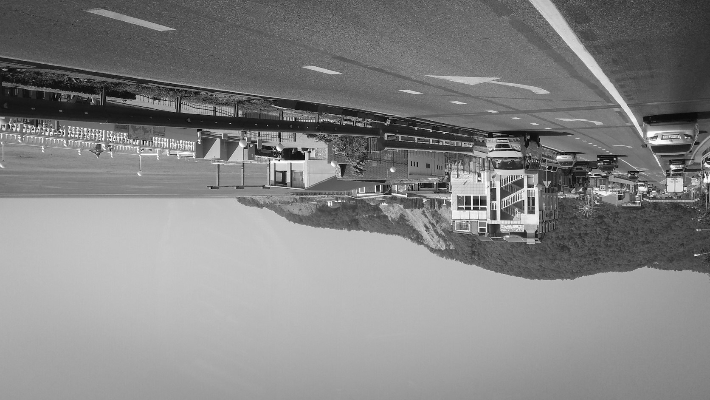

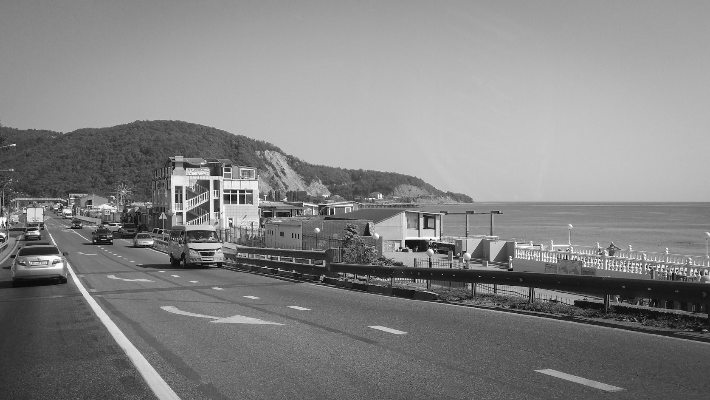

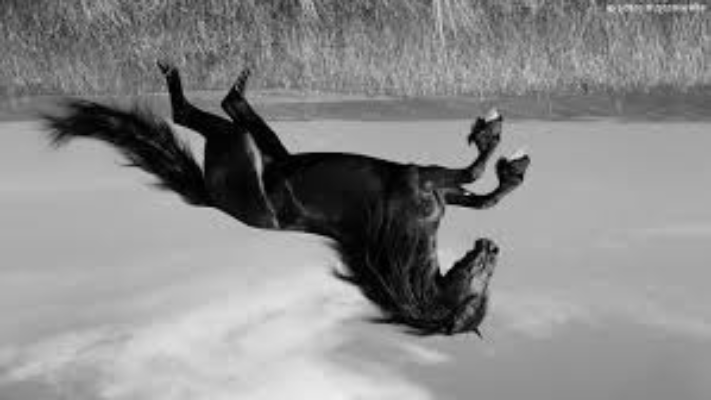

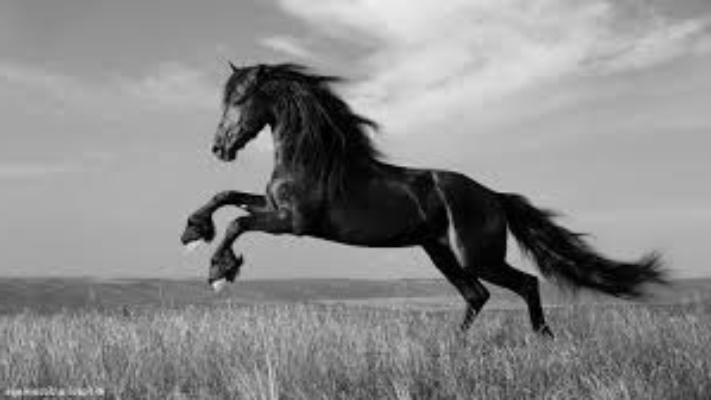

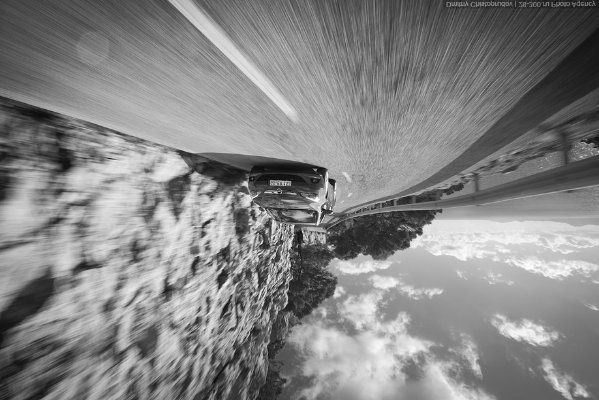

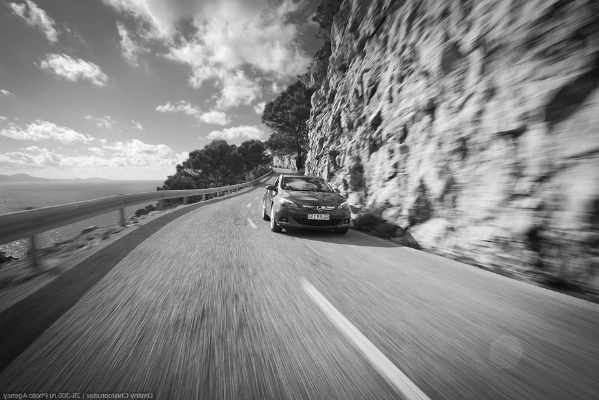

In [483]:
for i in range(len(imgListGray)):
  cv2_imshow(cv2.flip(imgListGray[i], 0))
  cv2_imshow(cv2.flip(imgListGray[i], 1))

5. лошадь на изображении «лошадь.jpg»

In [484]:
imgListCpy = imgList.copy()
for i in range(len(imgListCpy)):
  procent = 400 / (imgListCpy[i].shape[0] / 100)
  imgListCpy[i] = cv2.resize(imgListCpy[i],(int((imgListCpy[i].shape[1] / 100 ) * procent), 400))

In [485]:
imgListHSV = []
for i in range(len(imgListCpy)):
  imgListHSV.append(cv2.cvtColor(imgListCpy[i], cv2.COLOR_BGR2HSV))

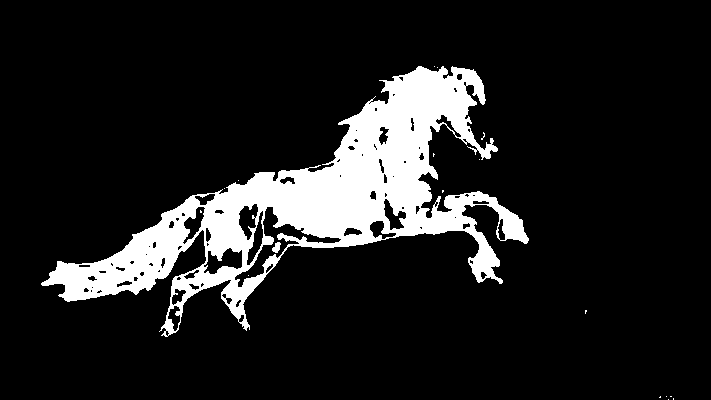

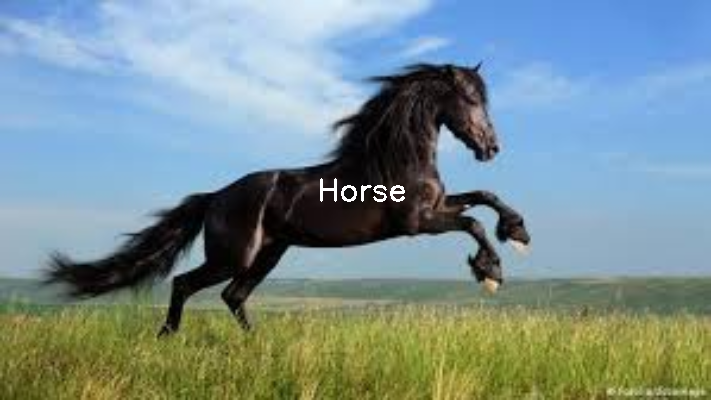

In [486]:
hrsImgHSV = imgListHSV[4]
hrsImgHSV = cv2.GaussianBlur(hrsImgHSV, (5,5), 0)
hrs_l = (0,10,0)
hrs_h = (180,150,90)
onlyHrs = cv2.inRange(hrsImgHSV, hrs_l, hrs_h)
cv2_imshow(onlyHrs)
moment = cv2.moments(onlyHrs, 1)
x_moment = moment['m01']
y_moment = moment['m10']
area = moment['m00']
x = int(x_moment / area)
y = int(y_moment / area)
img1 = cv2.putText(imgListCpy[4], "Horse", (y,x), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255) ,2)
cv2_imshow(img1)

6. желтый автобус на изображении «bus.jpg».

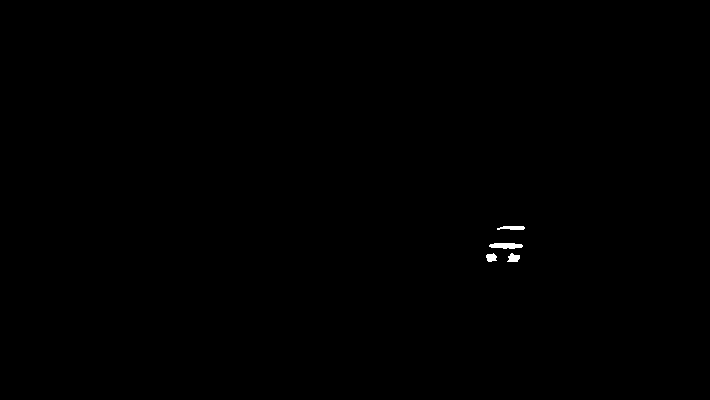

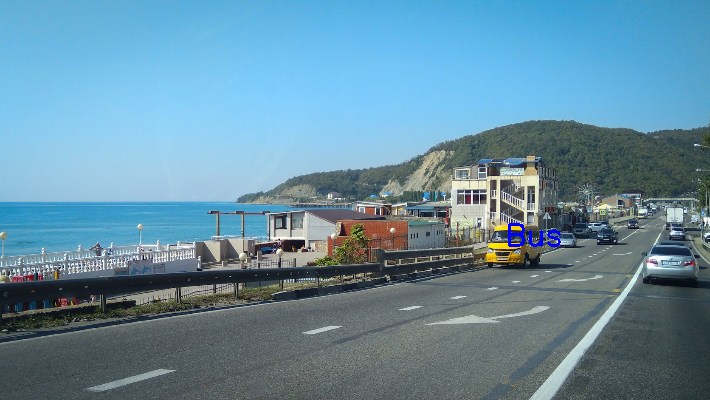

In [487]:
busImgHSV = imgListHSV[3]
busImgHSV = cv2.GaussianBlur(busImgHSV, (5,5), 0)
bus_l = (10,190,0)
bus_h = (70,255,255)
onlyBus = cv2.inRange(busImgHSV, bus_l, bus_h)
cv2_imshow(onlyBus)
moment = cv2.moments(onlyBus, 1)
x_moment = moment['m01']
y_moment = moment['m10']
area = moment['m00']
x = int(x_moment / area)
y = int(y_moment / area)
img1 = cv2.putText(imgListCpy[3], "Bus", (y,x), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0) ,2)
cv2_imshow(img1)

7. автомобиль на изображении «car.jpg».

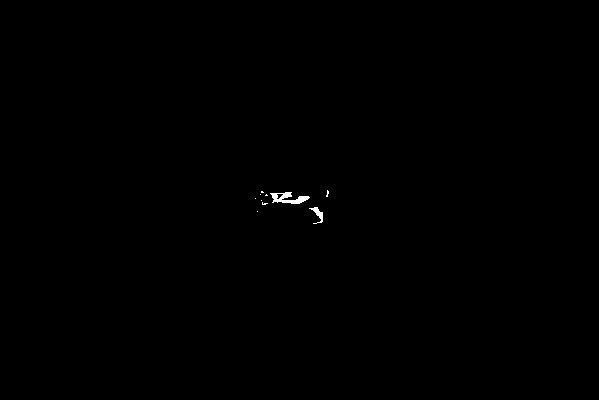

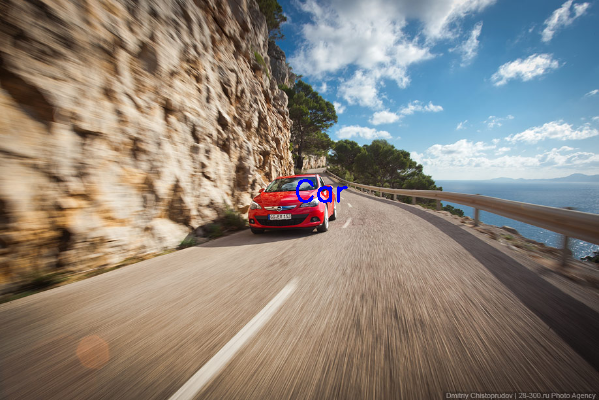

In [488]:
CarImgHSV = imgListHSV[5]
CarImgHSV = cv2.GaussianBlur(CarImgHSV, (5,5), 0)
Car_l = (5,180,170)
Car_h = (180,255,255)
onlyCar = cv2.inRange(CarImgHSV, Car_l, Car_h)
cv2_imshow(onlyCar)
moment = cv2.moments(onlyCar, 1)
x_moment = moment['m01']
y_moment = moment['m10']
area = moment['m00']
x = int(x_moment / area)
y = int(y_moment / area)
img1 = cv2.putText(imgListCpy[5], "Car", (y,x), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0) ,2)
cv2_imshow(img1)

8. лису и мышь на изображении «fox.jpg» (т.е. на результирующемизображении должны быть промаркированы оба объекта).

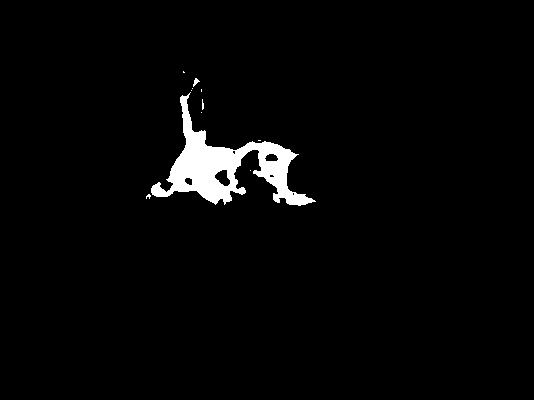

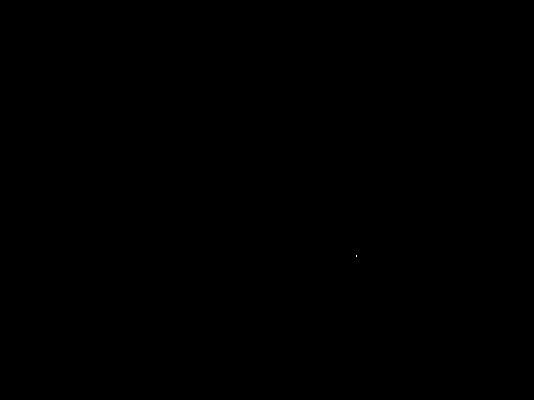

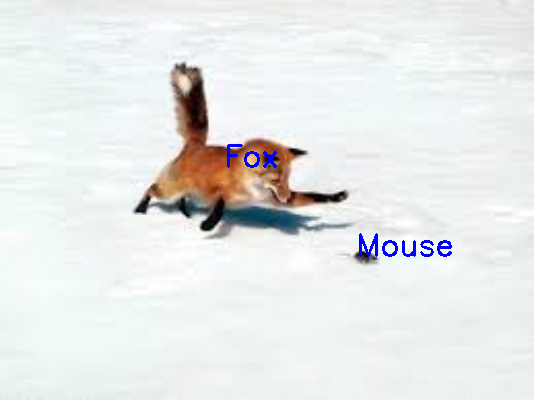

In [489]:
FoxImgHSV = imgListHSV[0]
FoxImgHSV = cv2.GaussianBlur(FoxImgHSV, (5,5), 0)
fox_l = (6,100,60)
fox_h = (20,255,200)
mouse_l = (10,35,81)
mouse_h = (15,35,100)
onlyFox = cv2.inRange(FoxImgHSV, fox_l, fox_h)
onlyMouse = cv2.inRange(FoxImgHSV, mouse_l, mouse_h)
cv2_imshow(onlyFox)
cv2_imshow(onlyMouse)

ObjHSV = [onlyFox,onlyMouse]
ObjList = []
Name = ["Fox","Mouse"]
for i in range(2):
  moment = cv2.moments(ObjHSV[i], 1)
  x_moment = moment['m01']
  y_moment = moment['m10']
  area = moment['m00']
  x = int(x_moment / area)
  y = int(y_moment / area)
  ObjList.append((y,x))
  img1 = cv2.putText(imgListCpy[0], Name[i], ObjList[i], cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0) ,2)
cv2_imshow(img1)

9. мяч на изображении «tennis_ball.jpg».

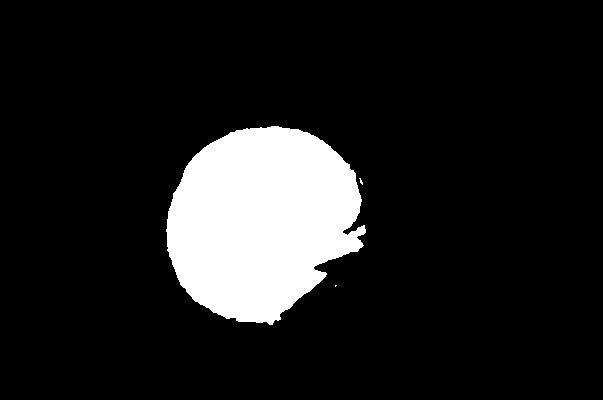

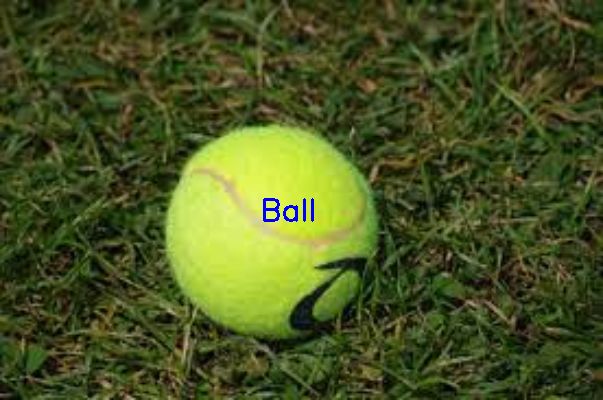

In [490]:
BalltImgHSV = imgListHSV[1]
BalltImgHSV = cv2.GaussianBlur(BalltImgHSV, (5,5), 0)
ball_l = (0,0,170)
ball_h = (180,255,255)
onlyBall = cv2.inRange(BalltImgHSV, ball_l, ball_h)
cv2_imshow(onlyBall)
moment = cv2.moments(onlyBall, 1)
x_moment = moment['m01']
y_moment = moment['m10']
area = moment['m00']
x = int(x_moment / area)
y = int(y_moment / area)
img1 = cv2.putText(imgListCpy[1], "Ball", (y,x), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0) ,2)
cv2_imshow(img1)

10.лодка на репродукции картины - изображение «Айвазовский.jpg»

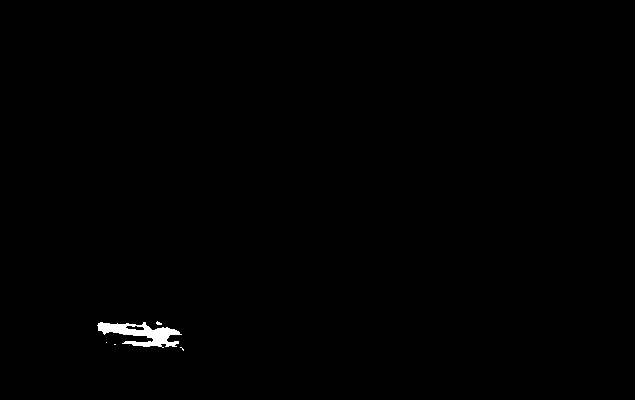

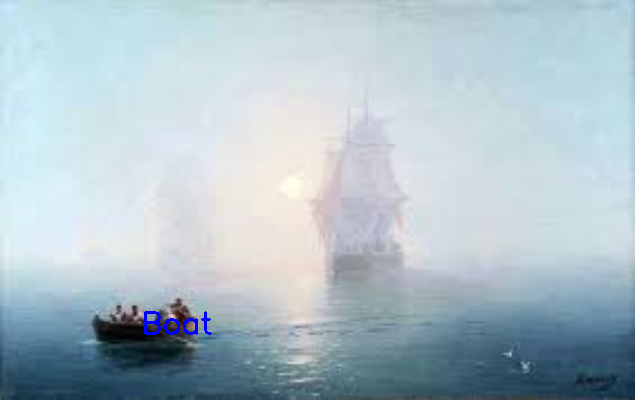

In [491]:
BoatImgHSV = imgListHSV[2]
BoatImgHSV = cv2.GaussianBlur(BoatImgHSV, (5,5), 0)
boat_l = (0,0,5)
boat_h = (180,120,50)
onlyBoat = cv2.inRange(BoatImgHSV, boat_l, boat_h)
cv2_imshow(onlyBoat)
moment = cv2.moments(onlyBoat, 1)
x_moment = moment['m01']
y_moment = moment['m10']
area = moment['m00']
x = int(x_moment / area)
y = int(y_moment / area)
img1 = cv2.putText(imgListCpy[2], "Boat", (y,x), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0) ,2)
cv2_imshow(img1)